# Análise Preditiva de Inadimplência: Um Estudo com o Conjunto HMEQ

## Grupo
<table width="300" border="2">
    <tr>
        <td><b>Nome do Aluno</b> </td>
        <td><b>RA</b></td>
     </tr>  
   <tr>
       <td>André Matteucci</td>
       <td>10403403</td>
   </tr>
   <tr>
       <td>Enzo Koji</td>
       <td>10403411</td>
   </tr>
   <tr>
       <td>Felipe Ribeiro</td>
       <td>10400831</td>
   </tr>
</table>

## Dataset

### Licença

Este projeto utiliza o [dataset HMEQ_Data](https://www.kaggle.com/datasets/ajay1735/hmeq-data), publicado originalmente por [Ajay Vallala (ajay1735)](https://www.kaggle.com/ajay1735) no Kaggle.

**Licença**: [CC0 1.0 Universal (Domínio Público)](https://creativecommons.org/publicdomain/zero/1.0/)

### Descrição

| Coluna  | Descrição                                                |
|---------|----------------------------------------------------------|
| BAD     | 1 = client defaulted on loan; 0 = loan repaid            |
| LOAN    | Amount of the loan request                               |
| MORTDUE | Amount due on existing mortgage                          |
| VALUE   | Value of current property                                |
| REASON  | DebtCon = debt consolidation; HomeImp = home improvement |
| JOB     | Six occupational categories                              |
| YOJ     | Years at present job                                     |
| DEROG   | Number of major derogatory reports                       |
| DELINQ  | Number of delinquent credit lines                        |
| CLAGE   | Age of oldest trade line in months                       |
| NINQ    | Number of recent credit inquiries                        |
| CLNO    | Number of credit lines                                   |
| DEBTINC | Debt-to-income ratio                                     |

## Análise Exploratória

In [117]:
%pip install matplotlib
%pip install pandas
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [118]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from IPython.display import display, Markdown

In [119]:
df = pd.read_csv("hmeq.csv")

### Visualização inicial dos dados

In [120]:
print("Shape:", df.shape)

Shape: (5960, 13)


In [121]:
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [122]:
print(df.dtypes)

BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


In [123]:
print("Valores duplicados: ", df.duplicated().sum())

Valores duplicados:  0


In [124]:
display(Markdown("### Valores nulos por coluna"))

null_values = df.isnull().sum()
null_percent = 100 * null_values / len(df)
null_df = pd.DataFrame({
    '#': null_values,
    '%': null_percent.round(2)
})

null_df[null_df['#'] > 0].sort_values('%', ascending=False)

### Valores nulos por coluna

,#,%
DEBTINC,1267,21.26
DEROG,708,11.88
DELINQ,580,9.73
MORTDUE,518,8.69
YOJ,515,8.64
NINQ,510,8.56
CLAGE,308,5.17
JOB,279,4.68
REASON,252,4.23
CLNO,222,3.72


In [125]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
BAD,5960.0,0.199497,0.399656,0.000000,0.000000,0.000000,0.000000,1.000000
LOAN,5960.0,18607.969799,11207.480417,1100.000000,11100.000000,16300.000000,23300.000000,89900.000000
MORTDUE,5442.0,73760.817200,44457.609458,2063.000000,46276.000000,65019.000000,91488.000000,399550.000000
VALUE,5848.0,101776.048741,57385.775334,8000.000000,66075.500000,89235.500000,119824.250000,855909.000000
YOJ,5445.0,8.922268,7.573982,0.000000,3.000000,7.000000,13.000000,41.000000
DEROG,5252.0,0.254570,0.846047,0.000000,0.000000,0.000000,0.000000,10.000000
DELINQ,5380.0,0.449442,1.127266,0.000000,0.000000,0.000000,0.000000,15.000000
CLAGE,5652.0,179.766275,85.810092,0.000000,115.116702,173.466667,231.562278,1168.233561
NINQ,5450.0,1.186055,1.728675,0.000000,0.000000,1.000000,2.000000,17.000000
CLNO,5738.0,21.296096,10.138933,0.000000,15.000000,20.000000,26.000000,71.000000


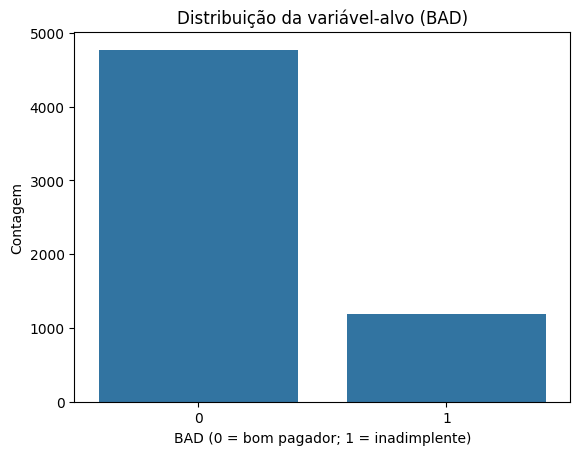

In [126]:
plt.figure()
sns.countplot(data=df, x='BAD')
plt.title("Distribuição da variável-alvo (BAD)")
plt.xlabel("BAD (0 = bom pagador; 1 = inadimplente)")
plt.ylabel("Contagem")
plt.show()